
🔥 Топ-15 тем по количеству постов:

     topic  n_posts  mean_weighted_sentiment  mean_weighted_reaction  \
0       -1    20850                -0.008076                0.002735   
56       5     1200                -0.014211                0.011489   
26       0      825                -0.008850                0.000000   
42       7      802                -0.010152                0.004583   
64       8      766                -0.014323               -0.007855   
9        4      725                -0.034518               -0.000960   
10       1      682                -0.100077               -0.055241   
63      16      631                -0.009890                0.005440   
3        2      631                 0.017612                0.008433   
72       3      561                -0.012887                0.008145   
54       6      510                 0.009405                0.000000   
6       11      502                -0.015719               -0.001454   
5       10      488        

/home/nlp_project/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


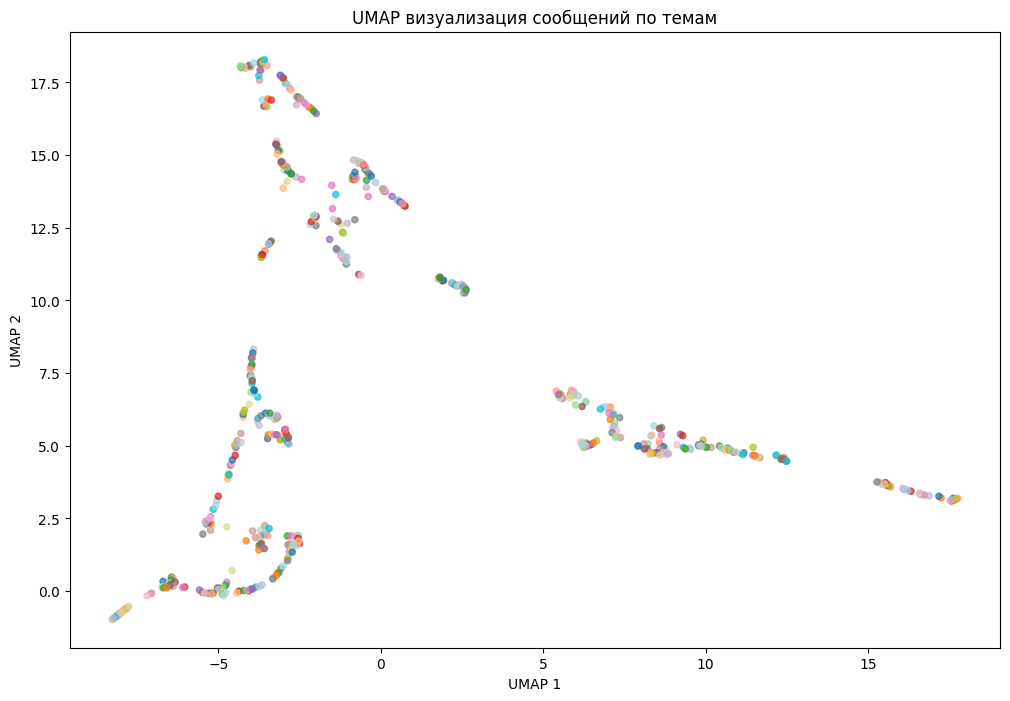

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
import numpy as np
from sklearn.preprocessing import StandardScaler

# -------------------- Настройки --------------------
CSV_PATH = "../data/bertopic_topic_summary_trending_v2.csv"

# -------------------- Загрузка отчёта --------------------
df = pd.read_csv(CSV_PATH)

# -------------------- Топ-15 тем по количеству постов --------------------
df_top15 = df.sort_values("n_posts", ascending=False).head(15)

# -------------------- Вывод ключевых метрик --------------------
print("\n🔥 Топ-15 тем по количеству постов:\n")
print(df_top15[[
    "topic",
    "n_posts",
    "mean_weighted_sentiment",
    "mean_weighted_reaction",
    "weighted_views",
    "example_post"
]])

# -------------------- UMAP визуализация --------------------
# Используем векторные представления сообщений, если они есть
# Для примера: стандартизируем avg_views и mean_weighted_reaction как proxy
features = df[['weighted_views', 'mean_weighted_reaction']].fillna(0)
features_scaled = StandardScaler().fit_transform(features)

umap_model = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = umap_model.fit_transform(features_scaled)

# Цвета по темам
topic_labels = df['topic'].astype(str)
unique_topics = topic_labels.unique()
topic_to_color = {topic: plt.cm.tab20(i % 20) for i, topic in enumerate(unique_topics)}
colors = topic_labels.map(topic_to_color)

plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=0.7, s=20)
plt.title("UMAP визуализация сообщений по темам")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


🔥 Топ-15 тем по количеству постов:

    topic  n_posts  mean_sentiment  mean_reaction      avg_views  \
0      -1     5727       -0.334381       0.241996  342049.157325   
1       3      526       -0.500000       0.731124  202745.682510   
2       0      452        0.933628       0.064916  221453.564159   
3       1      417       -0.273381       0.374158  431148.522782   
4       2      408       -0.387255       0.424870  347424.487745   
5       5      352       -1.000000      -0.507560  528440.039773   
6       4      305       -1.000000       0.492987  235061.101639   
7       9      238        1.000000      -0.548261  606651.327731   
8       8      225       -1.000000       0.810378  305702.284444   
9       6      223       -0.982063       0.976238  659705.919283   
10     12      215       -1.000000       0.557107  486307.944186   
11     11      211       -1.000000      -0.616744  347889.924171   
12      7      192       -0.369792       0.328714  518679.567708   
13     20  

/home/nlp_project/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


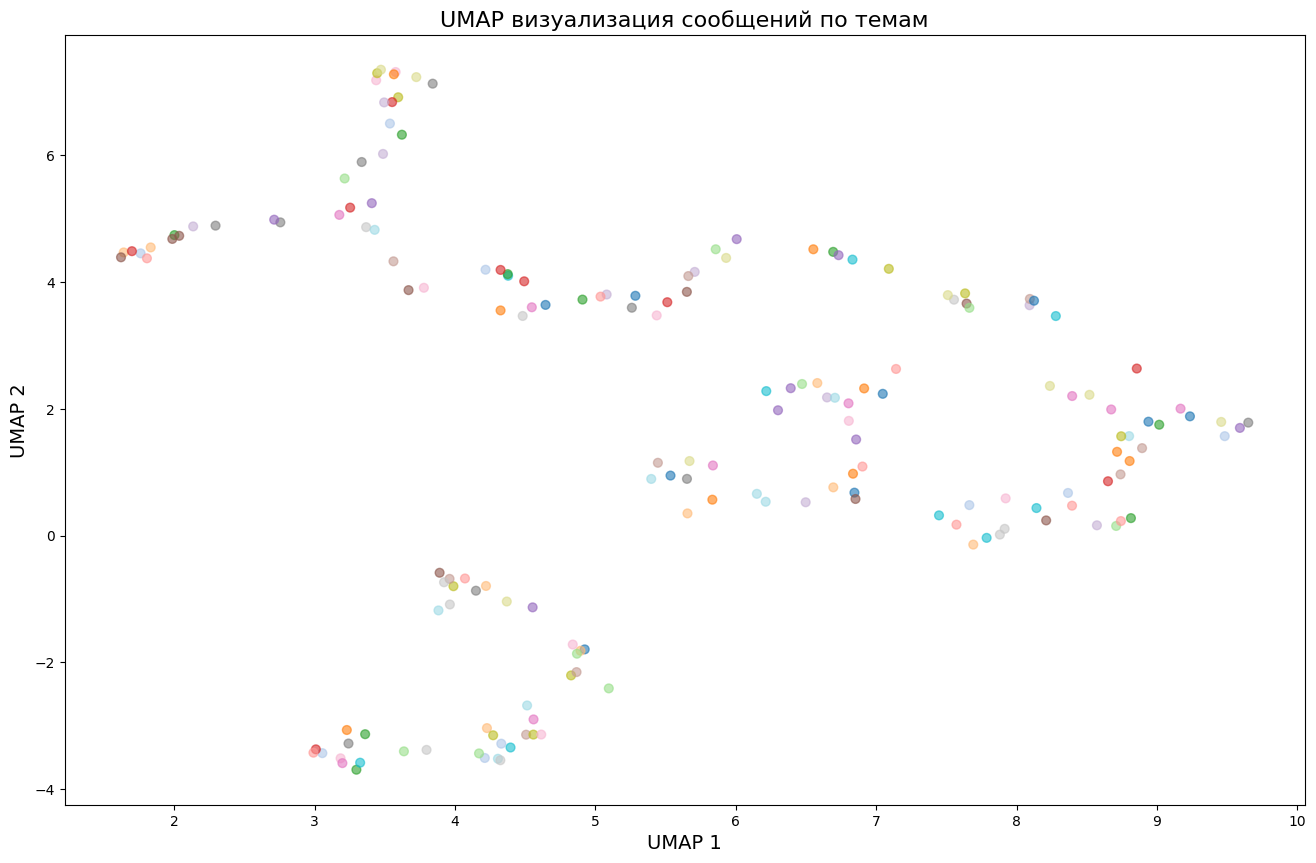

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# -------------------- Настройки --------------------
CSV_PATH = "../data/bertopic_topic_summary_v2.csv"  # исправленный путь, если другой CSV

# -------------------- Загрузка отчёта --------------------
df = pd.read_csv(CSV_PATH)

# -------------------- Топ-15 тем по количеству постов --------------------
df_top15 = df.sort_values("n_posts", ascending=False).head(15)

# Ограничиваем пример поста до 150 символов для вывода
df_top15['example_post_short'] = df_top15['example_post'].str.slice(0, 200) + "..."

# -------------------- Вывод ключевых метрик --------------------
print("\n🔥 Топ-15 тем по количеству постов:\n")
print(df_top15[[
    "topic",
    "n_posts",
    "mean_sentiment",
    "mean_reaction",
    "avg_views",
    "example_post_short"
]])

# -------------------- UMAP визуализация --------------------
# Для наглядности используем avg_views и mean_reaction
features = df[['avg_views', 'mean_reaction']].fillna(0)
features_scaled = StandardScaler().fit_transform(features)

umap_model = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = umap_model.fit_transform(features_scaled)

# Цвета по темам
topic_labels = df['topic'].astype(str)
unique_topics = topic_labels.unique()
topic_to_color = {topic: plt.cm.tab20(i % 20) for i, topic in enumerate(unique_topics)}
colors = topic_labels.map(topic_to_color)

plt.figure(figsize=(16, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=0.6, s=40)  # увеличили размер s и прозрачность
plt.title("UMAP визуализация сообщений по темам", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)
plt.show()

In [10]:
import pandas as pd

# -------------------- Загрузка отчёта --------------------
CSV_PATH = "../data/bertopic_topic_summary_trending_v3.csv"
df = pd.read_csv(CSV_PATH)

# -------------------- Создаём короткую версию поста для вывода --------------------
df['example_post_short'] = df['example_post'].str.slice(0, 100) + "…"  # первые 100 символов

# -------------------- Топ-15 тем по количеству постов --------------------
df_top15 = df.sort_values("n_posts", ascending=False).head(15)

# -------------------- Вывод ключевых метрик --------------------
print("\n🔥 Топ-15 тем по количеству постов:\n")
print(df_top15[[
    "topic",
    "n_posts",
    "mean_sentiment",
    "mean_reaction",
    "avg_views",
    "example_post_short"
]])

# -------------------- При желании можно сохранить в отдельный CSV --------------------
df_top15.to_csv("../data/bertopic_top15_summary.csv", index=False)
print("\n✅ Топ-15 тем сохранены в bertopic_top15_summary.csv")


🔥 Топ-15 тем по количеству постов:

    topic  n_posts  mean_sentiment  mean_reaction      avg_views  \
0      -1    20529       -0.323396       0.218941  235819.836816   
1       4      901       -0.605993       0.510114  220914.422863   
2       0      888       -1.000000       0.000000  413095.870495   
3       1      808        0.259901       0.126713  257235.616337   
4       7      804       -1.000000      -0.526218  150665.124378   
5       6      773       -0.217335       0.224243  288161.071151   
6       2      685       -1.000000      -0.518803  126861.162044   
7       3      651       -1.000000       0.502742  128169.253456   
8      19      564       -0.618794       0.645394  202875.076241   
9      16      554       -0.584838       0.421307  190499.584838   
10     20      539       -1.000000       0.850262  125413.916512   
11      5      519       -0.996146       0.627434  187234.321773   
12      8      495        1.000000      -0.556135  127410.715152   
13     11  